# Scores & Décisions

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from time import time
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.metrics import roc_curve, auc, mean_squared_error, accuracy_score, silhouette_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
# Quelques options d'affichage
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100) 
plt.style.use('default')

# Répertoire du fichier en local
CT_DIR_DATA = 'C:/Users/Mscao/OneDrive - INTESCIA/export/'

# Méthode de suppression de colonne
def DropCol(p_df, p_col):
    if p_col in p_df.columns:
        p_df = p_df.drop([p_col], axis=1)
    return p_df


In [3]:
# Méthodes d'import export
import pickle
import os
from sklearn.externals import joblib
CT_DIR_SAVE = 'save/'

def save_obj(obj, name):
    fn = CT_DIR_SAVE + name + '.pkl'
    try:
        os.remove(fn)
    except OSError:
        pass
    with open(fn, 'wb+') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
    print(fn, 'saved')

def load_obj(name):
    with open(CT_DIR_SAVE + name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def save_sklearn_obj(obj, name):
    fn = CT_DIR_SAVE + name + '.pkl'
    try:
        os.remove(fn)
    except OSError:
        pass
    joblib.dump(obj, fn)
    print(fn, 'saved')

def load_sklearn_obj(name):
    return joblib.load(CT_DIR_SAVE + name + '.pkl')

## 1. Lecture des tables

In [4]:
# Lecture
dfPred = pd.DataFrame()

lstSiren = [400, 500, 800, 1000]

# Concaténation de toutes les données
for i in lstSiren:
    n = CT_DIR_DATA + 'scores_predictions_PROD_%s' % str(i) + '.csv'
    print('reading', n, '...')
    f = pd.read_csv(n, sep=";", na_values=r"\0", low_memory=False)
    print('shape ', f.shape)
    dfPred = dfPred.append(f, ignore_index=True)
    # Il faut reindexer si on a concaténé les fichiers 
    dfPred.index = range(len(dfPred.index))

print(dfPred.shape[0], 'SIREN')

reading C:/Users/Mscao/OneDrive - INTESCIA/export/scores_predictions_PROD_400.csv ...
shape  (1890786, 87)
reading C:/Users/Mscao/OneDrive - INTESCIA/export/scores_predictions_PROD_500.csv ...
shape  (3242534, 87)
reading C:/Users/Mscao/OneDrive - INTESCIA/export/scores_predictions_PROD_800.csv ...
shape  (3057059, 87)
reading C:/Users/Mscao/OneDrive - INTESCIA/export/scores_predictions_PROD_1000.csv ...
shape  (2793415, 87)
10983794 SIREN


In [5]:
# On force les features catégorielles
dfPred ["ii_ACTIVNAT"] = dfPred ["ii_ACTIVNAT"].astype('object')
dfPred ["ii_CJ"] = dfPred ["ii_CJ"].astype('object')

Ici pour des pbs de mémoire on ne garde qu'une partie des infos :

    CJ = 5
    Données hors bilan

In [6]:
for col in dfPred.columns:
    if col.startswith('jb_'):
        # Pas de bilan pour l'instant (memory error)
        dfPred.drop([col], axis=1, inplace=True)

In [64]:
# Coeur du métier : cj=5
dfPred['ii_CJ'] = dfPred['ii_CJ'].fillna('')

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 6,
 6,
 0,
 6,
 0,
 6,
 6,
 6,
 0,
 6,
 6,
 0,
 0,
 0,
 6,
 0,
 0,
 6,
 0,
 6,
 6,
 0,
 0,
 6,
 6,
 6,
 0,
 0,
 6,
 0,
 6,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 0,
 6,
 0,
 6,
 0,
 0,
 6,
 0,
 0,
 6,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 6,
 0,
 6,
 0,
 6,
 0,
 6,
 0,
 0,
 6,
 0,
 6,
 0,
 6,
 6,
 0,
 6,
 0,
 6,
 0,
 6,
 0,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 0,
 0,
 6,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 6,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 0,
 0,
 6,
 0,
 6,
 6,
 0,
 6,
 6,
 6,
 0,
 0,
 6,
 0,
 6,
 0,
 6,
 0,
 0,
 6,


In [83]:
[[w for w in dfPred.iteritems() ]]


[[('siren', 0                 126
   1                 491
   2                 512
   3                 765
   4                 891
   5                1008
   6                1024
   7                1057
   8                1156
   9                1234
   10               2402
   11               2501
   12               4564
   13               6320
   14               6403
   15               6502
   16               9001
   17              12345
   18              12654
   19              16000
   20              22111
   21              45464
   22              45678
   23              51256
   24              57567
   25              58692
   26              74987
   27              80423
   28              93150
   29             118788
   30             123331
   31             123453
   32             123456
   33             180000
   34             260000
   35             325175
   36             331814
   37             333335
   38             340000
   39           

In [53]:
# Coeur du métier : cj=5
dfPred5 = dfPred[dfPred['ii_CJ'].notnull()]
print(dfPred5.shape[0], 'SIREN CJ=5')
dfPred5.head()

9745669 SIREN CJ=5


,siren,ii_ACTIVNAT,ii_ORIGINE,ii_MODET,ii_EXPLET,ii_DAPET,ii_CJ,ii_NBETAB,ii_APE_ENT,ii_PROCOL,ii_CAPITAL,ii_EFF_ENT,ii_TEFF_ENT,ii_ADR_DEP,ii_TCA,ii_TCAEXP,jl_PARTICIPATION,jl_ACTIONNARIAT,jd_NBPM,jd_NBPP,sb_EnBourse,jg_NBDE,jg_NBDF,bm_NBMARQUES
35,325175,0,1,NaN,NaN,2014.0,1300,0.0,3212Z,NaN,0.0,0.0,00,13,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
74,5420021,0,1,NaN,O,2009.0,5710,1.0,4669B,NaN,0.0,10.0,11,80,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
77,5420120,0,NaN,NaN,NaN,2008.0,5599,0.0,7010Z,0.0,711840.0,10.0,11,62,0.0,NaN,1,7,2,0,NaN,NaN,NaN,NaN
78,5440110,0,1,NaN,NaN,2008.0,1900,0.0,6820B,NaN,0.0,0.0,00,04,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
80,5440565,0,NaN,NaN,N,2008.0,1900,0.0,6820B,0.0,0.0,0.0,00,04,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN


In [84]:
dfPred.head()

,siren,ii_ACTIVNAT,ii_ORIGINE,ii_MODET,ii_EXPLET,ii_DAPET,ii_CJ,ii_NBETAB,ii_APE_ENT,ii_PROCOL,ii_CAPITAL,ii_EFF_ENT,ii_TEFF_ENT,ii_ADR_DEP,ii_TCA,ii_TCAEXP,jl_PARTICIPATION,jl_ACTIONNARIAT,jd_NBPM,jd_NBPP,sb_EnBourse,jg_NBDE,jg_NBDF,bm_NBMARQUES
0,126,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
1,491,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
2,512,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
3,765,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
4,891,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN


In [74]:
dfPred5 = dfPred[(len(str(dfPred['ii_CJ']))>0)]
print(dfPred5.shape[0], 'SIREN CJ=5')

KeyError: True

In [71]:
dfPred[dfPred['ii_CJ'].str.match('5')]

ValueError: cannot index with vector containing NA / NaN values

In [51]:
dfPred55 = dfPred5.iloc[dfPred5['ii_CJ'].str.match('5')][:]
print(dfPred55.shape[0], 'SIREN CJ=5')
dfPred55.head()

IndexError: positional indexers are out-of-bounds

In [27]:
dfPred.loc[dfPred['ii_CJ'].str.match('5')]

KeyError: 'None of [0          NaN\n1          NaN\n2          NaN\n3          NaN\n4          NaN\n5          NaN\n6          NaN\n7          NaN\n8          NaN\n9          NaN\n10         NaN\n11         NaN\n12         NaN\n13         NaN\n14         NaN\n15         NaN\n16         NaN\n17         NaN\n18         NaN\n19         NaN\n20         NaN\n21         NaN\n22         NaN\n23         NaN\n24         NaN\n25         NaN\n26         NaN\n27         NaN\n28         NaN\n29         NaN\n30         NaN\n31         NaN\n32         NaN\n33         NaN\n34         NaN\n35         NaN\n36         NaN\n37         NaN\n38         NaN\n39         NaN\n40         NaN\n41         NaN\n42         NaN\n43         NaN\n44         NaN\n45         NaN\n46         NaN\n47         NaN\n48         NaN\n49         NaN\n            ..\n10983744   NaN\n10983745   NaN\n10983746   NaN\n10983747   NaN\n10983748   NaN\n10983749   NaN\n10983750   NaN\n10983751   NaN\n10983752   NaN\n10983753   NaN\n10983754   NaN\n10983755   NaN\n10983756   NaN\n10983757   NaN\n10983758   NaN\n10983759   NaN\n10983760   NaN\n10983761   NaN\n10983762   NaN\n10983763   NaN\n10983764   NaN\n10983765   NaN\n10983766   NaN\n10983767   NaN\n10983768   NaN\n10983769   NaN\n10983770   NaN\n10983771   NaN\n10983772   NaN\n10983773   NaN\n10983774   NaN\n10983775   NaN\n10983776   NaN\n10983777   NaN\n10983778   NaN\n10983779   NaN\n10983780   NaN\n10983781   NaN\n10983782   NaN\n10983783   NaN\n10983784   NaN\n10983785   NaN\n10983786   NaN\n10983787   NaN\n10983788   NaN\n10983789   NaN\n10983790   NaN\n10983791   NaN\n10983792   NaN\n10983793   NaN\nName: ii_CJ, Length: 10983794, dtype: float64] are in the [index]'

In [14]:
dfPred.head()

,siren,ii_ACTIVNAT,ii_ORIGINE,ii_MODET,ii_EXPLET,ii_DAPET,ii_CJ,ii_NBETAB,ii_APE_ENT,ii_PROCOL,ii_CAPITAL,ii_EFF_ENT,ii_TEFF_ENT,ii_ADR_DEP,ii_TCA,ii_TCAEXP,jl_PARTICIPATION,jl_ACTIONNARIAT,jd_NBPM,jd_NBPP,sb_EnBourse,jg_NBDE,jg_NBDF,bm_NBMARQUES
0,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
1,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
2,512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
3,765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
4,891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
# Table des stats
dfStats = pd.read_csv(CT_DIR_DATA + 'stats_5_ans_PROD.csv', sep=";", na_values=r"\0")
print(dfStats.shape[0], 'SIREN')
dfStats.head()

In [ ]:
# Fusion
df = pd.merge(dfPred, dfStats)
print(df.shape)
print(len(set(df.siren)), 'SIREN')
df.head()

## 2. Nettoyage

### Les absorptions

In [ ]:
# Outliers
def RemoveAbsorptions(p_df):
    if not 'lastTypeEven' in p_df.columns:
        print("Absorptions déjà enlevées")
        return p_df
    nb = p_df.shape[0]
    p_df['lastTypeEven'].fillna('', inplace=True)
    p_df['lastTypeEven2'].fillna('', inplace=True)
    p_df['lastTypeEvents'] = p_df['lastTypeEven'] +';'+ p_df['lastTypeEven2']
    p_df = DropCol(p_df, 'lastTypeEven')
    p_df = DropCol(p_df, 'lastTypeEven2')
    # On enlève les absorptions (procol A ou évènement de la liste)
    p_df = p_df[(p_df['procol']!='A')]
    p_df = p_df[~(p_df['lastTypeEvents'].str.contains('2620') | p_df['lastTypeEvents'].str.contains('2621') | 
          p_df['lastTypeEvents'].str.contains('2720') | p_df['lastTypeEvents'].str.contains('2725') | 
          p_df['lastTypeEvents'].str.contains('5700') | p_df['lastTypeEvents'].str.contains('5500') | 
          p_df['lastTypeEvents'].str.contains('5501') | p_df['lastTypeEvents'].str.contains('5502') | 
          p_df['lastTypeEvents'].str.contains('5503') | p_df['lastTypeEvents'].str.contains('5510'))]
    print(p_df.shape[0] - nb, "absorptions")
    p_df = DropCol(p_df, 'lastTypeEvents')
    return p_df

In [ ]:
df = RemoveAbsorptions(df)
print('Reste', df.shape[0], 'SIREN')

### Les déjà inactifs

In [ ]:
df = df[(df['indiScoreMoins1']>0)]
print('Reste', df.shape[0], 'SIREN')

### Autre nettoyage

In [ ]:
# On enlève les colonnes dont toutes les valeurs sont nulles
df = df.dropna(axis=1, how='all')

In [ ]:
# Suppression
for col in ['indiScoreDate', 'indiScoreDateMoins1', 'indiScoreDateMoins2', 'indiScoreDateMoins3'
            , 'indiScoreDateMoins4', 'ii_PROCOL']:
    df = DropCol(df, col)


In [ ]:
display(df.info())

## Target

In [ ]:
df['target'] = (df['procol'].isnull())
df['target'].describe()

In [17]:
print(df[df['target']==1].shape[0], 'SIREN actifs')
print('\t', df[(df['target']==1) & (df['indiScoreMoins1']>6)].shape[0], 'TP (True Positifs)')
print('\t', df[(df['target']==1) & (df['indiScoreMoins1']<=6)].shape[0], 'FP (False Negatifs)')
print(df[df['target']==0].shape[0], 'SIREN en défaut')
print('\t', df[(df['target']==0) & (df['indiScoreMoins1']>6)].shape[0], 'FN (False Positifs)')
print('\t', df[(df['target']==0) & (df['indiScoreMoins1']<=6)].shape[0], 'TN (True Negatifs)')


924406 SIREN actifs
	 866718 TP (True Positifs)
	 57688 FP (False Negatifs)
56859 SIREN en défaut
	 40997 FN (False Positifs)
	 15862 TN (True Negatifs)


In [18]:
df.head(10)

,siren,ii_ACTIVNAT,ii_ORIGINE,ii_EXPLET,ii_DAPET,ii_CJ,ii_NBETAB,ii_APE_ENT,ii_CAPITAL,ii_EFF_ENT,ii_TEFF_ENT,ii_ADR_DEP,ii_TCA,jl_PARTICIPATION,jl_ACTIONNARIAT,jd_NBPM,jd_NBPP,sb_EnBourse,procol,indiScore,encours,procolMoins1,indiScoreMoins1,encoursMoins1,procolMoins2,indiScoreMoins2,encoursMoins2,procolMoins3,indiScoreMoins3,encoursMoins3,procolMoins4,indiScoreMoins4,encoursMoins4,target
35,325175,0,1,NaN,2014.0,1300,0.0,3212Z,0.0,0.0,00,13,NaN,0,0,0,0,NaN,NaN,12,5670,NaN,12.0,6107.0,NaN,12.0,6107.0,NaN,12.0,4825.0,NaN,NaN,NaN,True
77,5420120,0,NaN,NaN,2008.0,5599,0.0,7010Z,711840.0,10.0,11,62,0.0,1,7,2,0,NaN,NaN,9,30000,NaN,9.0,30000.0,NaN,9.0,30000.0,NaN,9.0,7500.0,NaN,9.0,7500.0,True
78,5440110,0,1,NaN,2008.0,1900,0.0,6820B,0.0,0.0,00,4,NaN,0,0,0,0,NaN,NaN,16,7000,NaN,16.0,7000.0,NaN,16.0,7000.0,NaN,16.0,7000.0,NaN,16.0,7000.0,True
82,5450093,10,9,NaN,2010.0,5499,0.0,4778C,18750.0,1.0,01,4,NaN,0,0,0,0,NaN,NaN,11,1891,NaN,14.0,1975.0,NaN,13.0,749.0,NaN,13.0,749.0,NaN,12.0,816.0,True
83,5450119,0,9,NaN,2008.0,5498,0.0,5630Z,14178.0,0.0,00,4,NaN,0,0,0,0,NaN,NaN,3,0,NaN,3.0,0.0,NaN,3.0,0.0,NaN,3.0,0.0,NaN,3.0,0.0,True
86,5472980,0,1,X,2008.0,1900,0.0,6820B,0.0,0.0,NN,44,NaN,0,0,0,0,NaN,NaN,16,7000,NaN,16.0,7000.0,NaN,16.0,7000.0,NaN,16.0,7000.0,NaN,NaN,NaN,True
91,5474960,0,1,X,2008.0,1900,0.0,6820B,0.0,0.0,00,44,NaN,0,0,0,0,NaN,NaN,16,7000,NaN,16.0,7000.0,NaN,16.0,7000.0,NaN,16.0,7000.0,NaN,16.0,7000.0,True
94,5480546,0,NaN,NaN,2015.0,5710,0.0,1712Z,310000.0,20.0,12,44,3.0,1,0,1,0,NaN,P,0,0,P,6.0,0.0,NaN,6.0,8406.0,P,6.0,3555.0,P,9.0,30000.0,False
96,5520028,0,1,N,2008.0,5499,0.0,6820B,0.0,0.0,00,80,NaN,0,0,0,0,NaN,NaN,12,17000,NaN,12.0,17000.0,NaN,12.0,17000.0,NaN,12.0,17000.0,NaN,12.0,17000.0,True
100,5520176,0,NaN,NaN,2008.0,5710,0.0,1721A,1000000.0,50.0,21,80,4.0,1,0,0,0,NaN,NaN,16,173647,NaN,16.0,169905.0,NaN,16.0,182607.0,NaN,15.0,211914.0,NaN,15.0,211914.0,True


In [19]:
df.describe()

,siren,ii_DAPET,ii_NBETAB,ii_CAPITAL,ii_EFF_ENT,ii_TCA,jl_PARTICIPATION,jl_ACTIONNARIAT,jd_NBPM,jd_NBPP,sb_EnBourse,indiScore,encours,indiScoreMoins1,encoursMoins1,indiScoreMoins2,encoursMoins2,indiScoreMoins3,encoursMoins3,indiScoreMoins4,encoursMoins4
count,9.812650e+05,924564.000000,924564.000000,9.245640e+05,924564.000000,56921.000000,981265.000000,981265.000000,981265.000000,981265.000000,488.0,981265.000000,981265.000000,981265.000000,981262.000000,595153.000000,595150.000000,444147.000000,444144.000000,344177.000000,344176.000000
mean,4.113882e+08,2009.992977,0.166297,8.030618e+05,7.398947,3.373395,0.159826,0.082981,0.268146,0.000003,1.0,11.589493,20335.172358,11.959041,20116.322579,11.647129,26824.573939,11.315233,31350.223101,11.336263,35446.122556
std,6.132534e+07,3.205188,0.527935,4.218149e+08,261.906256,2.088636,0.370854,5.365960,15.899202,0.001749,0.0,4.073289,54698.189415,3.231680,52211.511472,3.483364,63633.449555,3.848439,70111.607129,3.832512,74467.838553
min,3.251750e+05,1922.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.794658e+08,2008.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,10.000000,2432.000000,10.000000,3137.000000,10.000000,3036.000000,9.000000,2016.000000,9.000000,2840.000000
50%,4.182296e+08,2008.000000,0.000000,0.000000e+00,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.0,12.000000,5375.000000,12.000000,6073.000000,12.000000,7000.000000,12.000000,7000.000000,12.000000,8072.000000
75%,4.510153e+08,2012.000000,0.000000,7.800000e+03,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.0,14.000000,12041.000000,14.000000,12345.000000,14.000000,19718.000000,14.000000,27132.250000,14.000000,30000.000000
max,4.999994e+08,2088.000000,166.000000,4.016400e+11,220000.000000,9.000000,3.000000,3720.000000,7198.000000,1.000000,1.0,19.000000,500000.000000,19.000000,500000.000000,19.000000,500000.000000,19.000000,500000.000000,19.000000,500000.000000


In [20]:
df.select_dtypes(exclude=[np.number]).describe()

,ii_ACTIVNAT,ii_ORIGINE,ii_EXPLET,ii_CJ,ii_APE_ENT,ii_TEFF_ENT,ii_ADR_DEP,procol,procolMoins1,procolMoins2,procolMoins3,procolMoins4,target
count,924564.0,919516,203687,924564.0,924564,924564,924561,56859,30401,29456,16332,11263,981265
unique,18.0,14,3,194.0,724,16,188,7,7,9,8,8,2
top,0.0,1,O,5499.0,6820B,00,75,P,R,A,P,P,True
freq,779526.0,643349,139610,272308.0,63335,424944,65956,21510,12070,10752,8866,6093,924406


## Valeurs manquantes

In [21]:
# Description des features et valeurs manquantes
tab_info = pd.DataFrame(df.dtypes).T.rename(index={0:'Type'})
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'Valeurs manquantes (nb)'}))
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'Valeurs manquantes (%)'}))
display(tab_info)

,siren,ii_ACTIVNAT,ii_ORIGINE,ii_EXPLET,ii_DAPET,ii_CJ,ii_NBETAB,ii_APE_ENT,ii_CAPITAL,ii_EFF_ENT,ii_TEFF_ENT,ii_ADR_DEP,ii_TCA,jl_PARTICIPATION,jl_ACTIONNARIAT,jd_NBPM,jd_NBPP,sb_EnBourse,procol,indiScore,encours,procolMoins1,indiScoreMoins1,encoursMoins1,procolMoins2,indiScoreMoins2,encoursMoins2,procolMoins3,indiScoreMoins3,encoursMoins3,procolMoins4,indiScoreMoins4,encoursMoins4,target
Type,int64,object,object,object,float64,object,float64,object,float64,float64,object,object,float64,int64,int64,int64,int64,float64,object,int64,int64,object,float64,float64,object,float64,float64,object,float64,float64,object,float64,float64,bool
Valeurs manquantes (nb),0,56701,61749,777578,56701,56701,56701,56701,56701,56701,56701,56704,924344,0,0,0,0,980777,924406,0,0,950864,0,3,951809,386112,386115,964933,537118,537121,970002,637088,637089,0
Valeurs manquantes (%),0,5.77836,6.2928,79.2424,5.77836,5.77836,5.77836,5.77836,5.77836,5.77836,5.77836,5.77866,94.1992,0,0,0,0,99.9503,94.2055,0,0,96.9019,0,0.000305728,96.9982,39.3484,39.3487,98.3356,54.7373,54.7376,98.8522,64.9252,64.9253,0


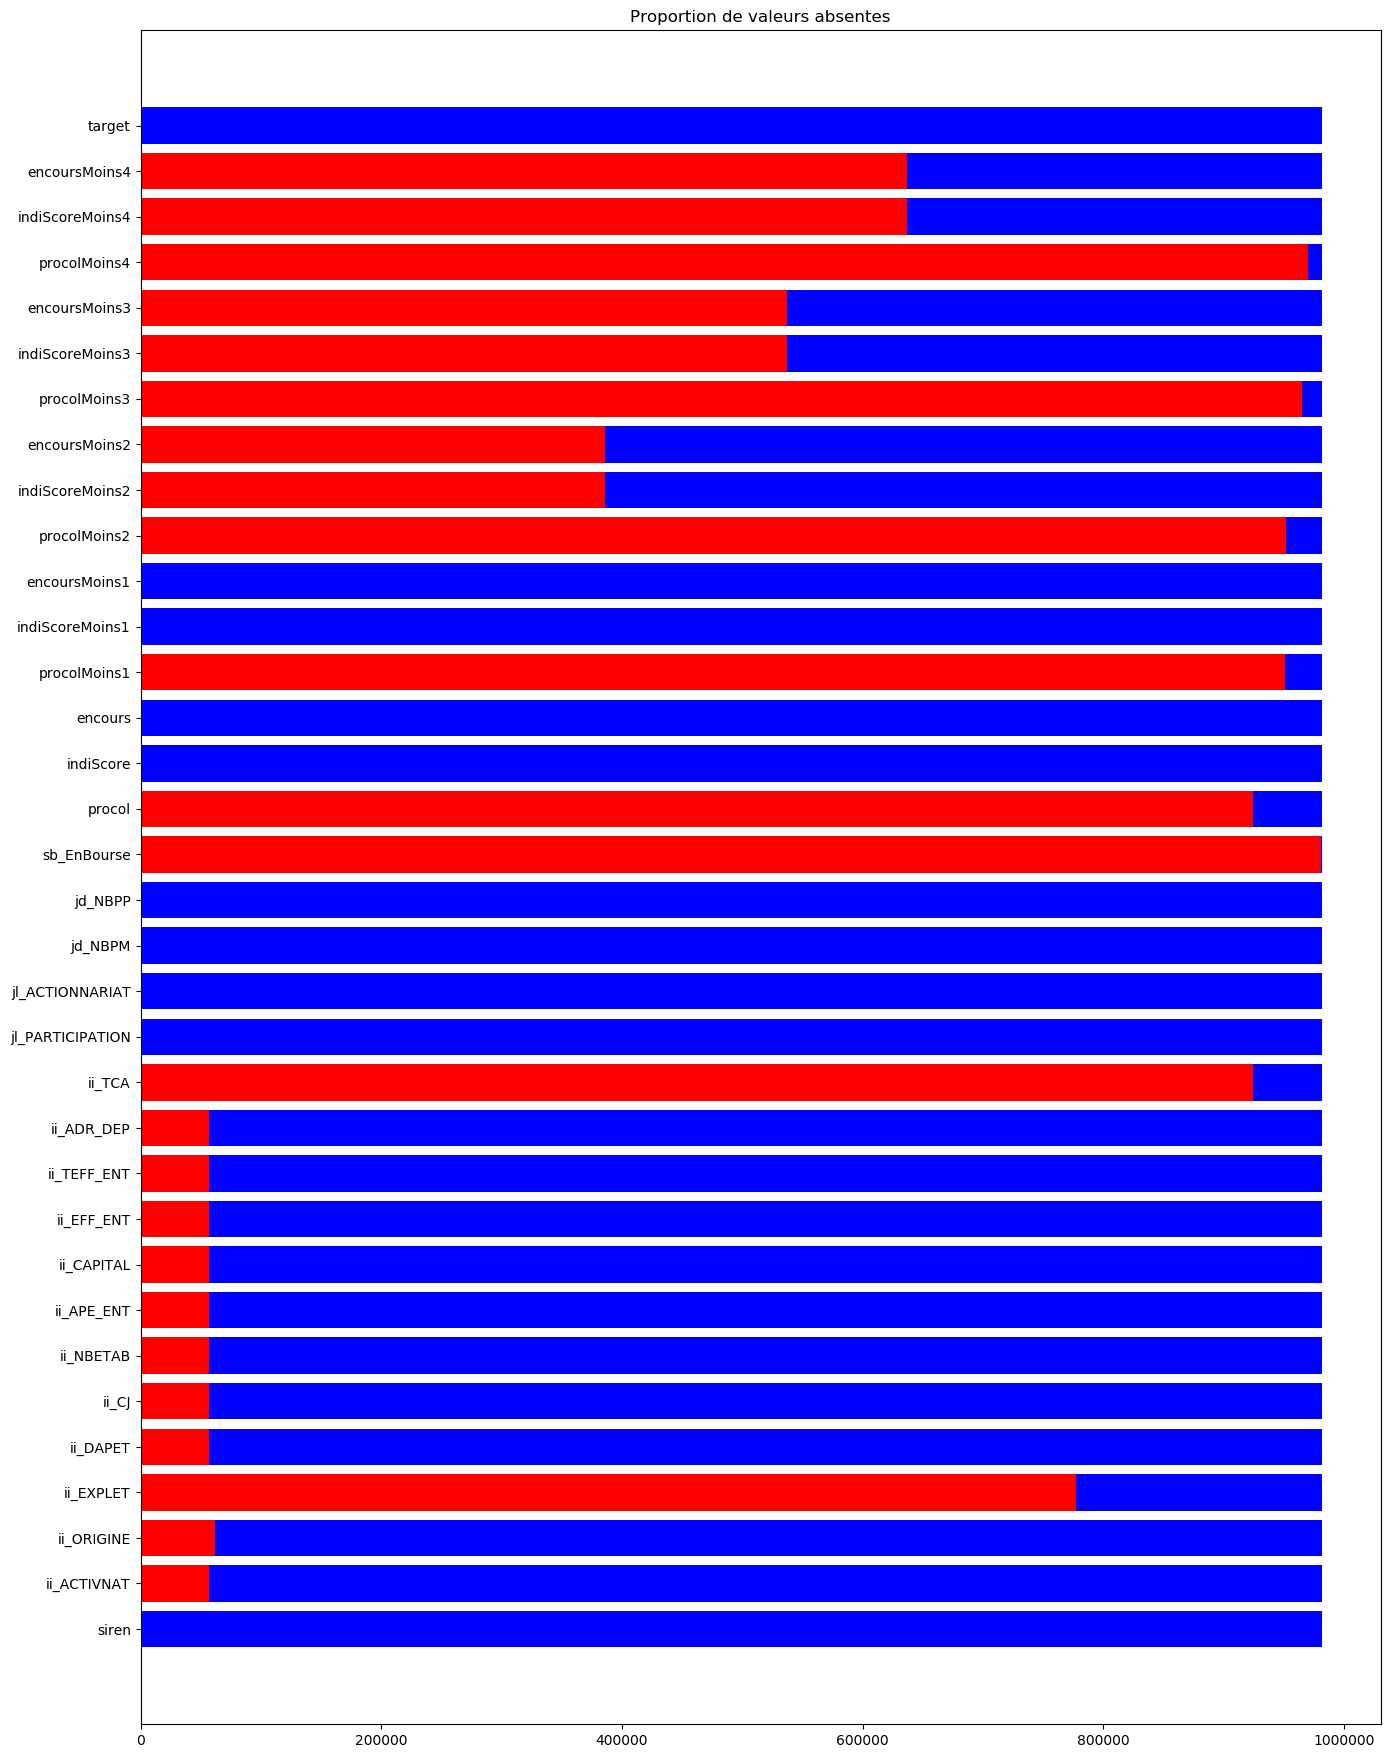

In [22]:
if True:
    x1=df.isnull().sum().values
    x2=df.notnull().sum().values
    index = np.arange(len(x1))

    fig, ax = plt.subplots(figsize=(16, 22))
    plt.barh(index, x1+x2, color='b')
    plt.barh(index, x1, color='r')
    ax.set_yticks(index)
    ax.set_yticklabels(df.columns.values.tolist())

    plt.title("Proportion de valeurs absentes")

In [23]:
# On remplace par la valeur la plus courante
#for i in ['ii_ORIGINE', 'ii_DAPET', 'ii_EXPLET', 'ii_APE_ENT', 'ii_TEFF_ENT', 'ii_ADR_DEP']:
for i in df.columns:
    if df[i].dtype == object:
        df[i] = df[i].fillna(df[i].mode())

# On remplace par la valeur moyenne
for i in ['indiScoreMoins1', 'indiScoreMoins2', 'indiScoreMoins3', 'indiScoreMoins4']:
    mean = np.mean(df[i])
    df[i] = df[i].fillna(mean)

# On remplace par ''
for i in ['procol', 'procolMoins1', 'procolMoins2', 'procolMoins3', 'procolMoins4']:
    df[i] = df[i].fillna('')

# On remplace le reste par 0
for i in df.columns:
    df[i] = df[i].fillna(0)


## Préparation des data

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def PrepareData(p_df, p_dropcols, p_strat=None, bSave=False):

    # La target
    y = p_df['target']

    # Gardons comme données toutes les colonnes sauf la target bien sûr
    X = DropCol(p_df, 'target')
    for col in p_dropcols:
        X = DropCol(X, col)

    scalingDFcols = []
    categDFcols = []
    for col in X.columns:
        if X[col].dtype == object:
            categDFcols.append(col)
        else:
            scalingDFcols.append(col)
    
    print('Numérique :\n\t', scalingDFcols)
    print('Catégories :\n\t', categDFcols)

    categDF = X[categDFcols]
    scalingDF = X[scalingDFcols]
    
    # Binarisation en dummies pour garder la maitrise des noms des colonnes
    categDF_encoded = pd.get_dummies(categDF.astype(np.str))
    print('Après binarisation les catégories prennent', categDF_encoded.shape[1], 'dimensions.')

    # Concaténation
    x_final = pd.concat([scalingDF, categDF_encoded], axis=1)

    if bSave:
        # Sauvegarde de la liste des colonnes
        x_save = x_final.columns
        save_obj(x_save, 'model_columns')

    x_train, x_test, y_train, y_test = train_test_split(x_final, y, test_size = 0.2, random_state=0, stratify=p_strat)
    
    # On comparera avec la prédiction actuelle
    y_pred_actuelle = (x_test.indiScoreMoins1>6)

    # Seules les xnum premières colonnes sont numériques
    xnum = scalingDF.shape[1]
    x_train_numerical = x_train.iloc[:, 0:xnum]
    x_test_numerical = x_test.iloc[:, 0:xnum]

    # Création d'un scaler pour les valeurs numériques 
    scaler = StandardScaler()
    # Qu'on entraine avec le training set
    scaler.fit(x_train_numerical) 

    if bSave:
        # Sauvegarde
        save_sklearn_obj(scaler, 'model_scaler')
    
    x_train_numerical = scaler.transform(x_train_numerical)
    x_test_numerical = scaler.transform(x_test_numerical)

    x_train = x_train.copy()
    x_test = x_test.copy()
    x_train.loc[:, 0:xnum] = x_train_numerical
    x_test.loc[:, 0:xnum] = x_test_numerical

    print('x_train :', x_train.shape)
    return x_train, x_test, y_train, y_test, y_pred_actuelle

In [25]:
dropcols = ['procol', 'indiScore', 'siren']
x_train, x_test, y_train, y_test, y_pred_actuelle = PrepareData(df, dropcols, p_strat=df['target'], bSave=True)

Numérique :
	 ['ii_ACTIVNAT', 'ii_DAPET', 'ii_CJ', 'ii_NBETAB', 'ii_CAPITAL', 'ii_EFF_ENT', 'ii_TCA', 'jl_PARTICIPATION', 'jl_ACTIONNARIAT', 'jd_NBPM', 'jd_NBPP', 'sb_EnBourse', 'encours', 'indiScoreMoins1', 'encoursMoins1', 'indiScoreMoins2', 'encoursMoins2', 'indiScoreMoins3', 'encoursMoins3', 'indiScoreMoins4', 'encoursMoins4']
Catégories :
	 ['ii_ORIGINE', 'ii_EXPLET', 'ii_APE_ENT', 'ii_TEFF_ENT', 'ii_ADR_DEP', 'procolMoins1', 'procolMoins2', 'procolMoins3', 'procolMoins4']
Après binarisation les catégories prennent 986 dimensions.
save/model_columns.pkl saved
save/model_scaler.pkl saved
x_train : (785012, 1007)


In [26]:
import itertools
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2)
class_names = ['False', 'True']

# Affichage de matrice de confusion
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    # Possibilité de normalisation
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  3182   8190]
 [ 11583 173298]]
Normalized confusion matrix
[[0.28 0.72]
 [0.06 0.94]]


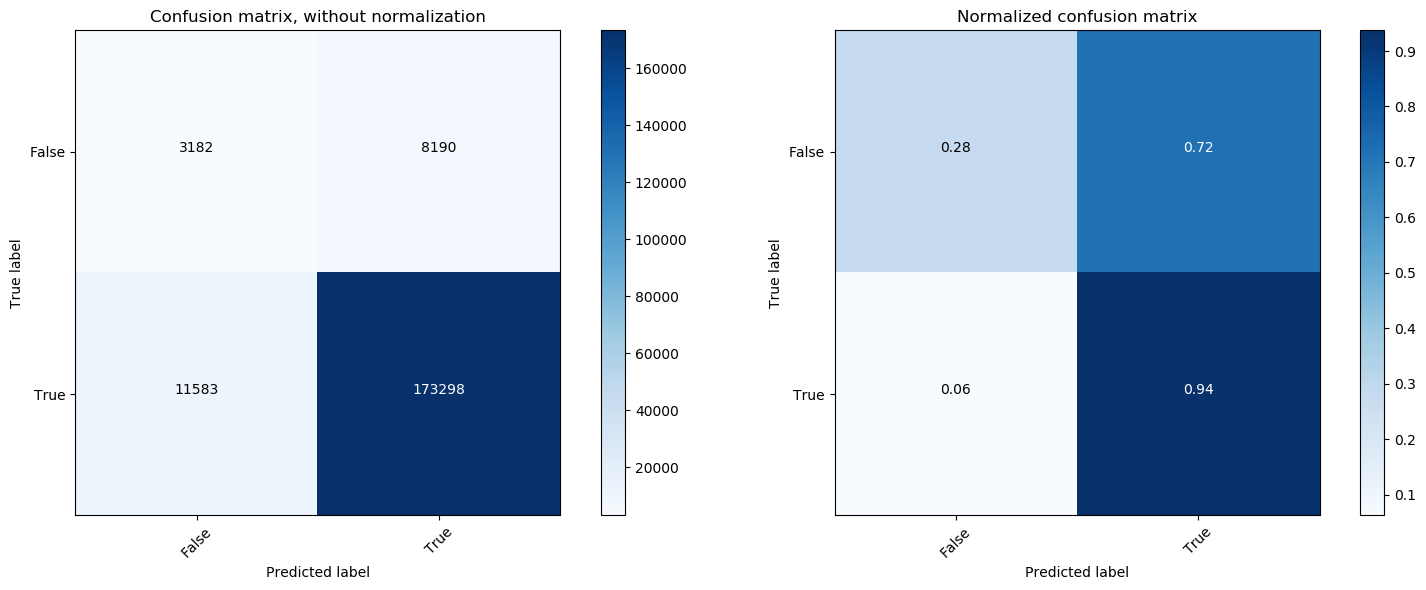

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_actuelle)

# Plot normalized & non-normalized confusion matrix
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')

Confusion matrix, without normalization
[[ 15862  40997]
 [ 57688 866718]]
Normalized confusion matrix
[[0.28 0.72]
 [0.06 0.94]]


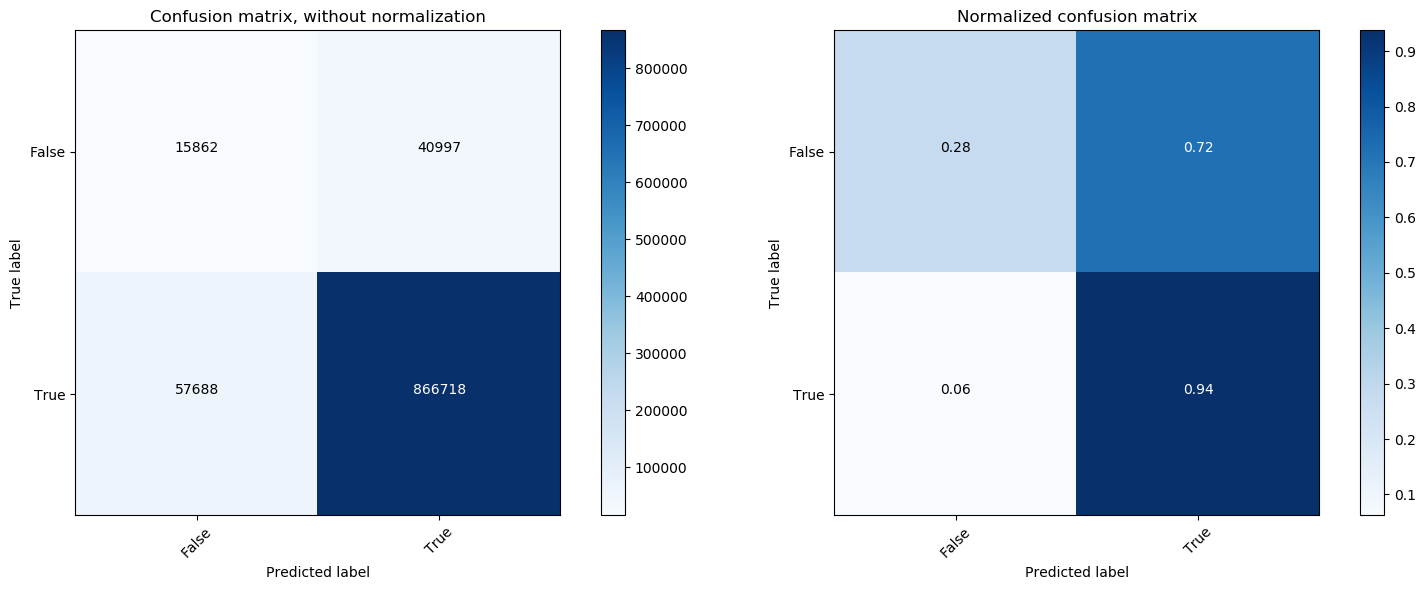

In [28]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(df['target'], (df.indiScoreMoins1>6))

# Plot normalized & non-normalized confusion matrix
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')

## Recherche d'un modèle

In [29]:
from sklearn import dummy
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier

fpr = []
tpr = []
labels = []
rocs = []

def RunModel(model, label, params={}):
    print (label)
    t0 = time()
    gs = GridSearchCV(model, param_grid=params, cv=5)
    gs.fit(x_train, y_train)

    # On récupère la prédiction de la valeur positive
    y_pred = gs.predict_proba(x_test)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

    # Aire sous la courbe
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ("\tAUC = %.3f" % roc_auc)
    print("\tDone in %is" % (time() - t0))
    
    fpr.append(false_positive_rate)
    tpr.append(true_positive_rate)
    rocs.append(roc_auc)
    labels.append(label)

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, gs.predict(x_test))
    # Plot normalized & non-normalized confusion matrix
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
    plt.subplot(1, 2, 2)
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
    plt.show()

    return gs.best_estimator_

Méthode naive
	AUC = 0.500
	Done in 43s
Confusion matrix, without normalization
[[     0  11372]
 [     0 184881]]
Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


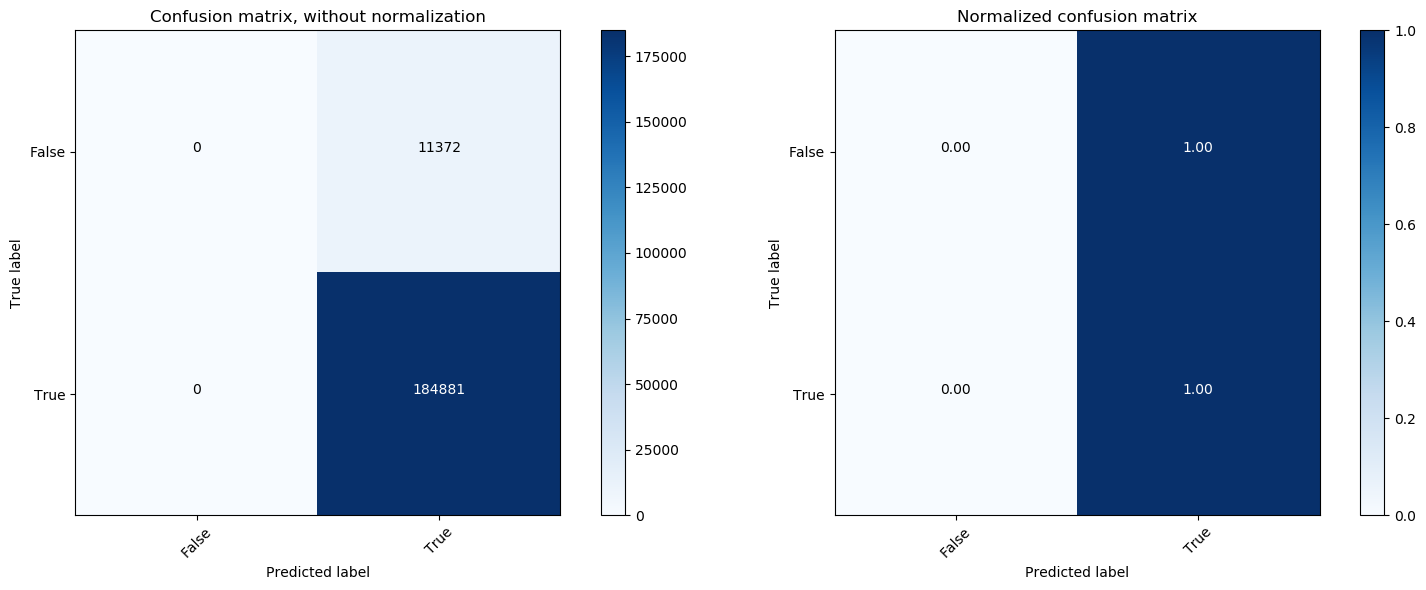

GaussianNB
	AUC = 0.591
	Done in 385s
Confusion matrix, without normalization
[[ 11198    174]
 [171352  13529]]
Normalized confusion matrix
[[0.98 0.02]
 [0.93 0.07]]


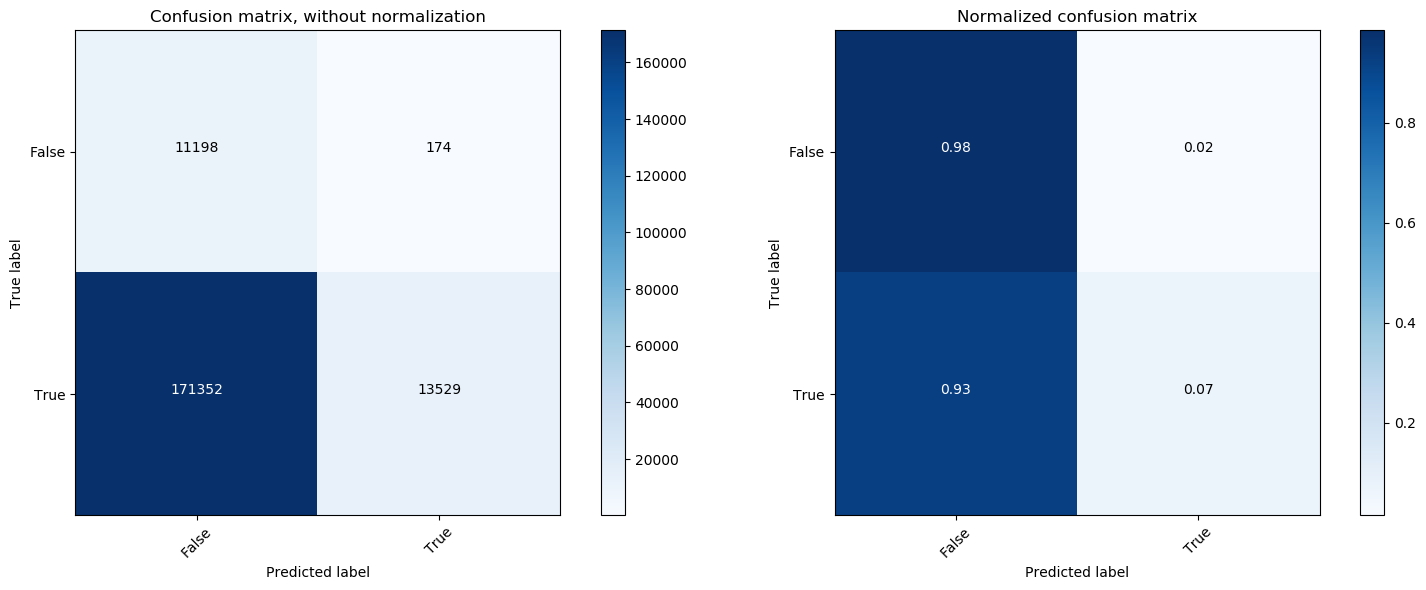

GradientBoostingClassifier
	AUC = 0.983
	Done in 62099s
Confusion matrix, without normalization
[[  7507   3865]
 [  1483 183398]]
Normalized confusion matrix
[[0.66 0.34]
 [0.01 0.99]]


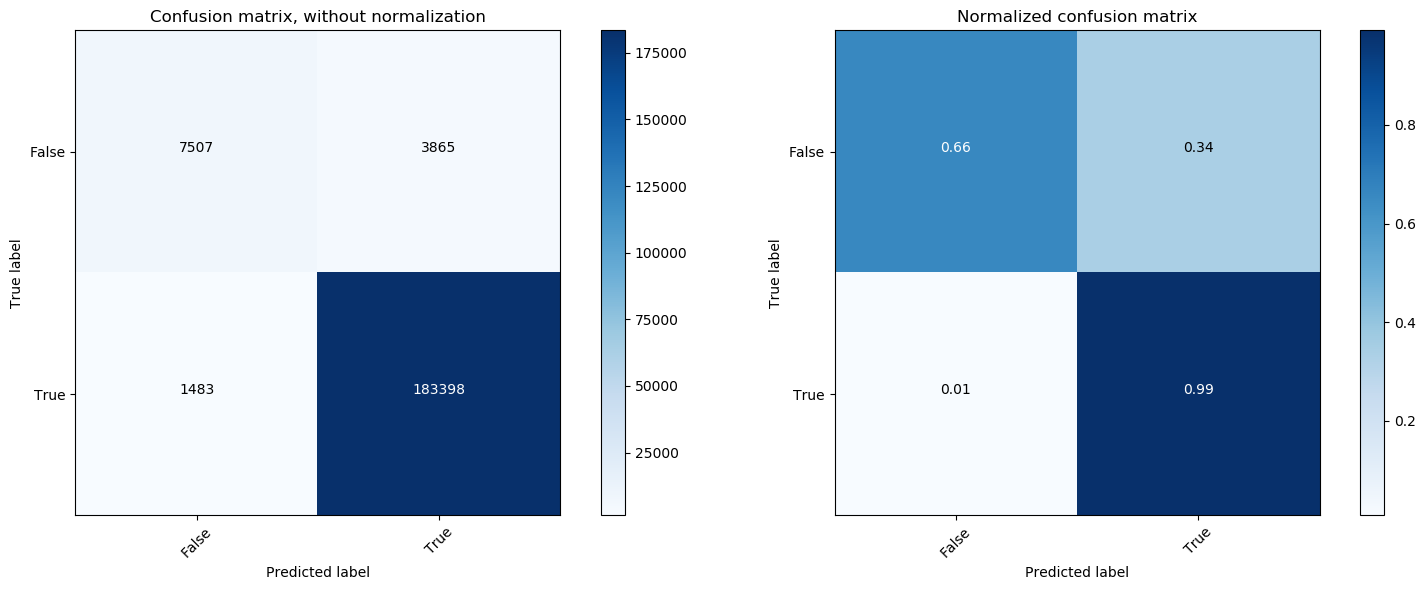

ExtraTreesClassifier
	AUC = 0.901
	Done in 1366s
Confusion matrix, without normalization
[[  6501   4871]
 [  1565 183316]]
Normalized confusion matrix
[[0.57 0.43]
 [0.01 0.99]]


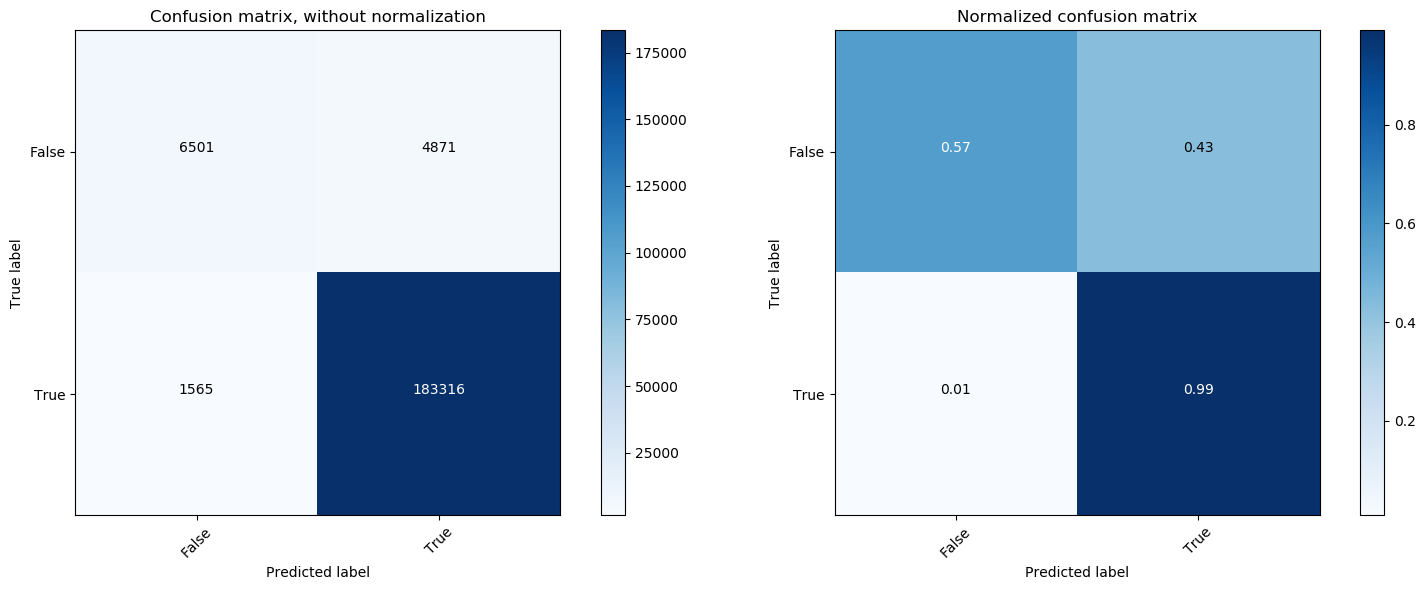

LogisticRegression
	AUC = 0.959
	Done in 792s
Confusion matrix, without normalization
[[  4994   6378]
 [   709 184172]]
Normalized confusion matrix
[[0.44 0.56]
 [0.   1.  ]]


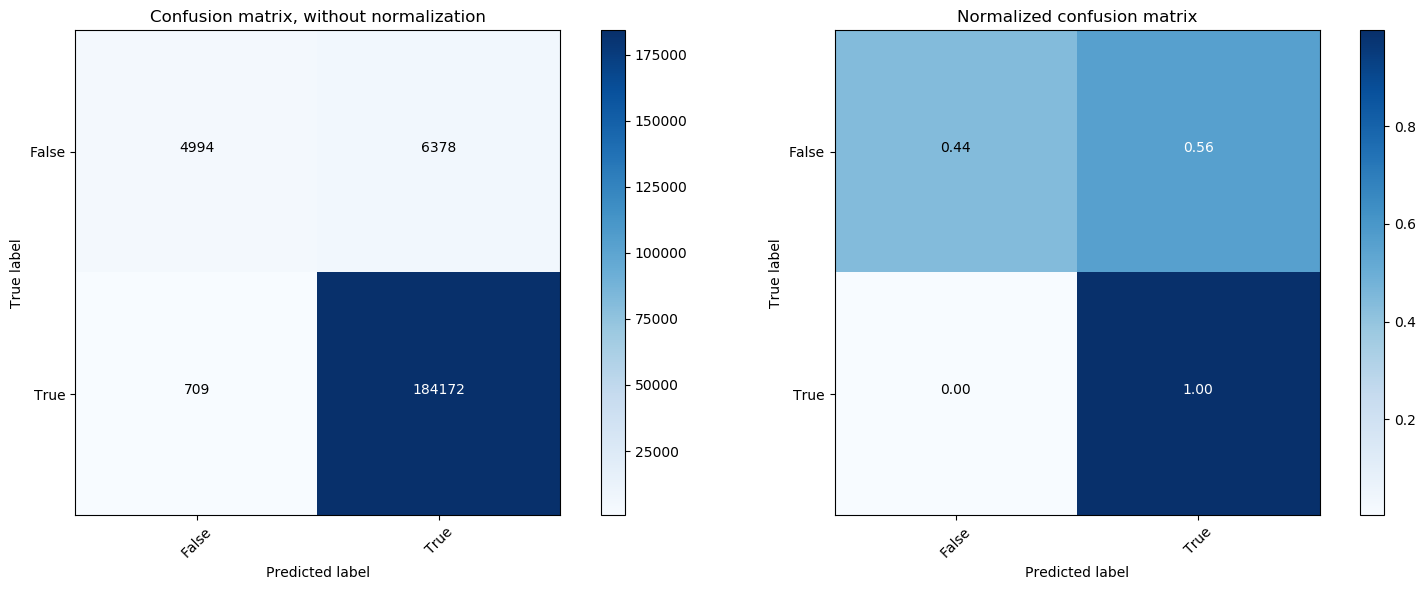

RandomForestClassifier


KeyboardInterrupt: 

In [30]:
# Méthode naive par la classe la plus fréquente pour comparer
RunModel(dummy.DummyClassifier(strategy='most_frequent'), 'Méthode naive')
RunModel(GaussianNB(), 'GaussianNB')
#RunModel(KNeighborsClassifier(), 'KNeighborsClassifier')
RunModel(GradientBoostingClassifier(), 'GradientBoostingClassifier')
RunModel(ExtraTreesClassifier(), 'ExtraTreesClassifier')
RunModel(LogisticRegression(), 'LogisticRegression')
bestModel = RunModel(RandomForestClassifier(n_estimators=100), 'RandomForestClassifier')


In [ ]:
#scaler=load_sklearn_obj('scaler')
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_actuelle)

# Aire sous la courbe
roc_auc = auc(false_positive_rate, true_positive_rate)
print ("\tAUC = %.3f" % roc_auc)

fpr.append(false_positive_rate)
tpr.append(true_positive_rate)
rocs.append(roc_auc)
labels.append('réel')


In [ ]:
# Courbes ROC

plt.figure(figsize=(16,10))
plt.title('Receiver Operating Characteristic')
colors = ['pink', 'b', 'g', 'r', 'y', 'c', 'm', 'gray', 'aqua', 'lime', 'k']
for i in range(len(fpr)):
    plt.plot(fpr[i], tpr[i], color=colors[i], label = 'AUC %s = %0.3f' % (labels[i], rocs[i]))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.xlabel('1 - spécificité', fontsize=14)
plt.ylabel('Sensibilité', fontsize=14)
plt.show()

procolMoins1_      0.098994
indiScoreMoins1    0.079893
procolMoins1_R     0.050472
indiScoreMoins2    0.044091
indiScoreMoins3    0.036489
indiScoreMoins4    0.035553
procolMoins1_PL    0.033102
jg_NBDF            0.031002
ii_CJ              0.028901
procolMoins3_      0.027583
ii_DAPET           0.027290
ii_CAPITAL         0.021709
procolMoins2_R     0.019244
ii_EFF_ENT         0.014281
procolMoins2_      0.013670
dtype: float64


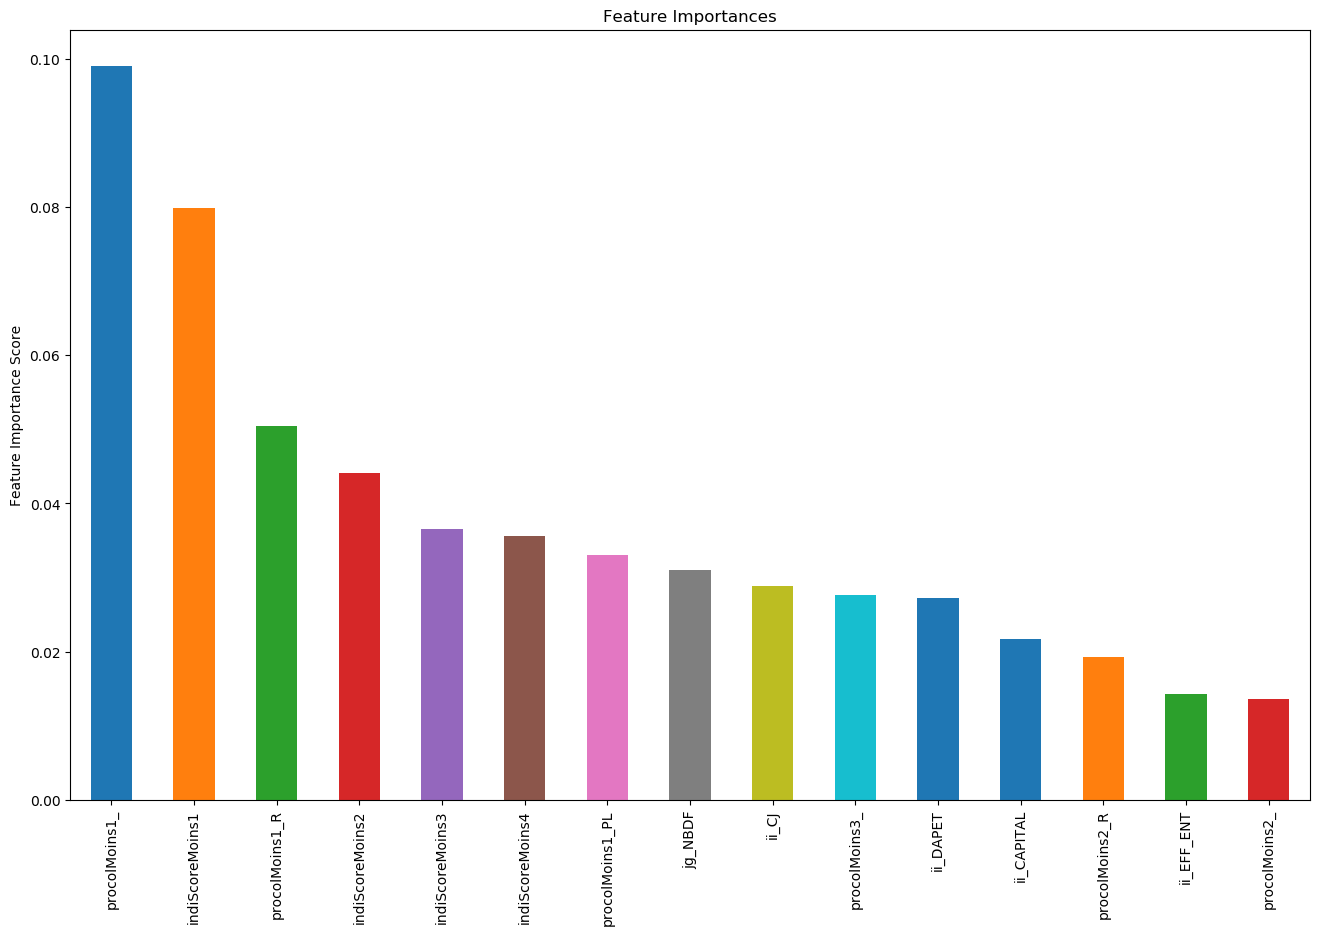

In [108]:
predictors = [x for x in x_train.columns]
feat_imp = pd.Series(bestModel.feature_importances_, predictors).sort_values(ascending=False)

print(feat_imp[:15])

plt.figure(figsize=(16, 10))
feat_imp[:15].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

## PCA 

In [59]:
def displayPCA(p_df, p_color):
    X_scaled = StandardScaler().fit_transform(p_df.fillna(0))
    
    pca = PCA(n_components=None)
    pca.fit(X_scaled)
    nbvar = len(pca.explained_variance_ratio_) +1

    fig, ax = plt.subplots(figsize=(16, 8))
    plt.bar(range(1,nbvar), pca.explained_variance_ratio_, alpha = 0.5, align = 'center', label = 'individual explained variance')
    plt.step(range(1,nbvar), np.cumsum(pca.explained_variance_ratio_), where = 'mid', label = 'cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc = 'best')
    plt.title('Variance cumulée', fontsize=18)
    plt.show()
    print("Deux composantes nous permettent d'expliquer %.2f pourcent de la variance" % (np.cumsum(pca.explained_variance_ratio_[:2])[1]*100))
    print('\n')
    
    # projeter X sur les composantes principales
    X_projected = pca.transform(X_scaled)
    # afficher chaque observation
    fig = plt.figure(figsize=(16, 10))
    plt.scatter(X_projected[:, 0], X_projected[:, 1], c=p_color)
    plt.xlim([-5.5, 5.5])
    plt.ylim([-4, 4])
    plt.colorbar()
    plt.title('Projection sur les composantes principales', fontsize=18)
    plt.show()

    # S'il y a trop de feature on n'affichage pas ce dernier graphe qui sera illisible
    if nbvar > 15: return
    print('\n')
    pcs = pca.components_
    fig = plt.figure(figsize=(16, 10))
    for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
        # Afficher un segment de l'origine au point (x, y)
        plt.plot([0, x], [0, y], color='k')
        # Afficher le nom (data.columns[i]) de la performance
        plt.text(x, y, p_df.columns[i], fontsize='18')
    # Afficher une ligne horizontale y=0
    plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
    # Afficher une ligne verticale x=0
    plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')
    plt.xlim([-0.7, 0.7])
    plt.ylim([-0.7, 0.7])
    plt.title('Contribution de chaque variable aux composantes principales', fontsize=18)
    plt.show()

    return

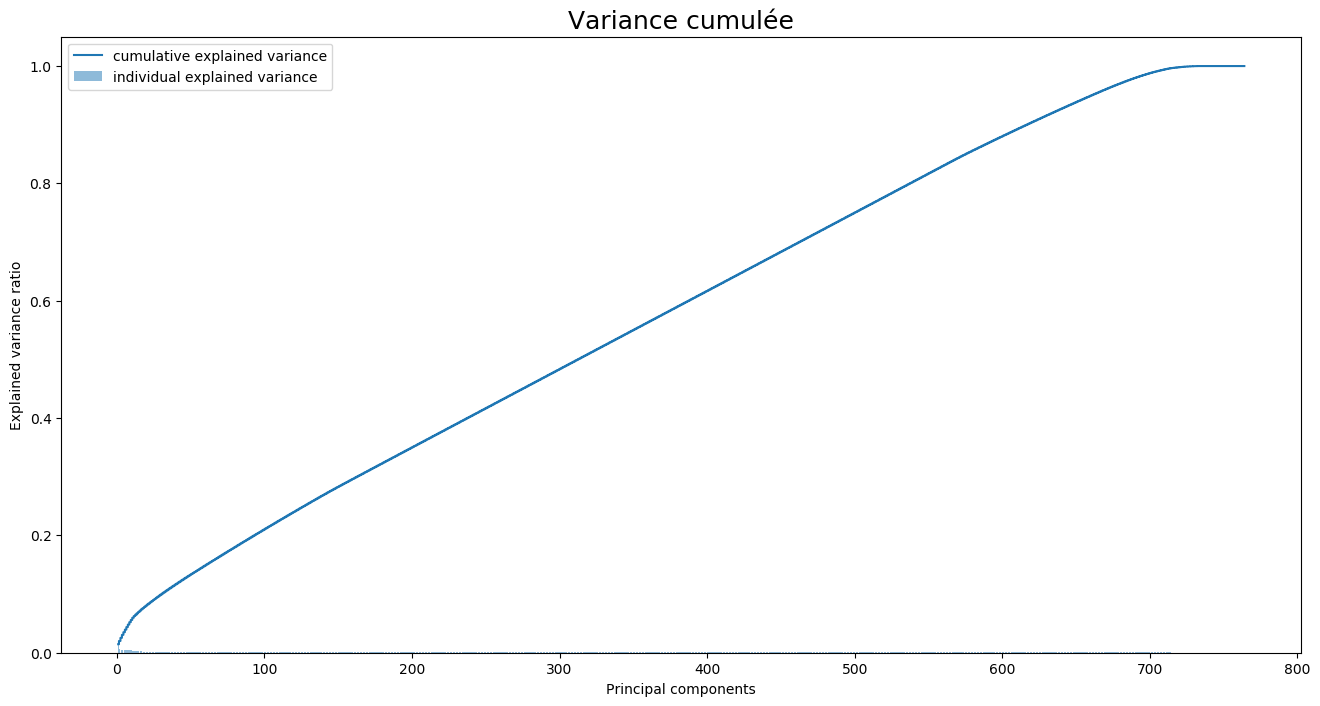

Deux composantes nous permettent d'expliquer 2.00 pourcent de la variance




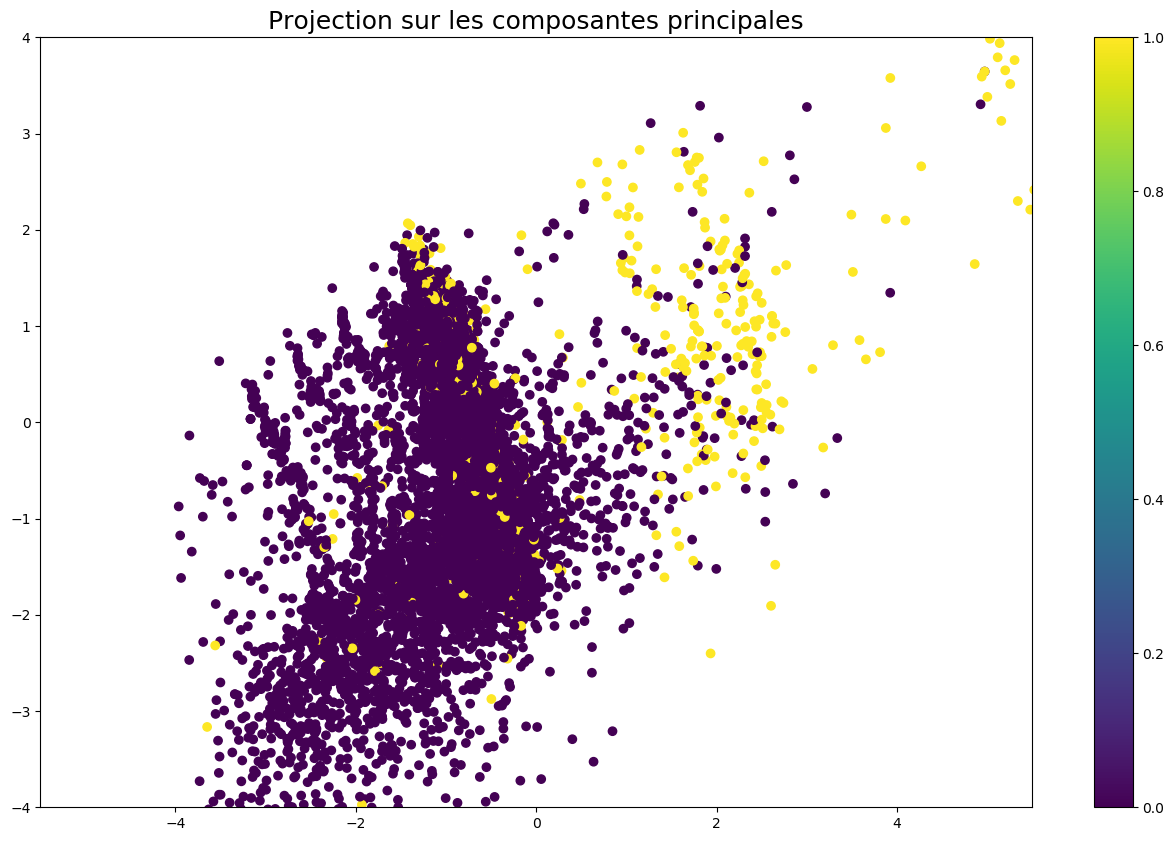

In [60]:
displayPCA(x_train, y_train)

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, HuberRegressor, Lars, SGDRegressor
from sklearn.dummy import DummyRegressor

modeles = [
    # Dummy comme base de référence
    (DummyRegressor(strategy='mean'), {}),
    # Régression simple pour commencer
    (LinearRegression(), {}),
    # LARS (Pas forcément adapté car meilleur avec plus de features que de points et sensible aux outliers mais pour voir)
#    (Lars(), {}),
    # Ridge (régulation de Tykhonov, norme l2)
#    (Ridge(), {'alpha':[0.01, 0.1, 1]}),
    # Coefficient de régularisation de norme l1
#    (Lasso(), {'alpha':[0.01, 0.1, 1]}),
    # Combinaison de Ridge et LASSO
#    (ElasticNet(), {'alpha':[0.01, 0.1, 1], 'l1_ratio':[0.1, 0.5, 0.9]}),
    # Descente de gradient stochastique, optimisation de l'approximation à chaque itération, adapdé aux grandes dimensions
    # On va pouvoir traiter les outliers de différentes façons
#    (SGDRegressor(), {'loss':['squared_loss', 'huber', 'epsilon_insensitive'], 'max_iter':[1000]}),
#        (SGDRegressor(loss='epsilon_insensitive'), {'penalty':['l1', 'l2', 'elasticnet'], 'max_iter':[1000]}),
#        (SGDRegressor(loss='epsilon_insensitive'), {'l1_ratio':[0.1, 0.15, 0.2], 'max_iter':[1000]}),
#        (SGDRegressor(loss='epsilon_insensitive'), {'alpha':10.0**-np.arange(4,7), 'max_iter':[1000]}),
    # Bonne gestion des outliers
#    (HuberRegressor(), {'alpha':[0.0001, 0.001, 0.01, 1], 'epsilon':[1, 1.35]}),
]

for mod, params in modeles:
    t0 = time()
    # On entraine le modèle sur différents paramètres et en validation croisée
    gs = GridSearchCV(mod, params, scoring = 'neg_mean_absolute_error', cv=5, refit=True)
    gs.fit(x_train, y_train)
    print("MAE = %.3f" % mean_absolute_error(y_test, gs.best_estimator_.predict(x_test)))
    print("\tbest_estimator_=", gs.best_estimator_)
    print("\tDone in %is" % (time() - t0))


MAE = 0.165
	best_estimator_= DummyRegressor(constant=None, quantile=None, strategy='mean')
	Done in 1s
MAE = 1352387.940
	best_estimator_= LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
	Done in 12s


## Description

In [113]:
# Quantité des différents éléments
pd.DataFrame([{'Entreprises': dftotal['siren'].nunique(),    
               'Codes NAF': dftotal['ii_APE_ENT'].nunique(),
               'Forme juridique': dftotal['ii_CJ'].nunique(),
               'Situation juridique': dftotal['ii_PROCOL'].nunique(),
              }], columns = ['Entreprises', 
                             'Codes NAF', 
                             'Forme juridique', 'Situation juridique'
                ], index = ['Quantité'])

,Entreprises,Codes NAF,Forme juridique,Situation juridique
Quantité,38433,576,108,2


In [114]:
# Code NAF
df.ii_APE_ENT.unique()

array([nan, '9312Z', '4399C', '6820A', '8621Z', '6420Z', '6820B', '0220Z',
       '0240Z', '4619A', '4781Z', '6630Z', '4773Z', '8690E', '8790A',
       '0121Z', '7021Z', '4299Z', '5610C', '2511Z', '7022Z', '5911B',
       '4322B', '4942Z', '8552Z', '4932Z', '5610A', '8690F', '9602B',
       '8899B', '8299Z', '3832Z', '0142Z', '4789Z', '4663Z', '8690D',
       '4669B', '9499Z', '5630Z', '8110Z', '4312A', '8623Z', '8622C',
       '8559A', '4631Z', '0111Z', '6831Z', '0141Z', '8532Z', '8810A',
       '4332A', '4642Z', '8559B', '5510Z', '4333Z', '0145Z', '4651Z',
       '4771Z', '8230Z', '9602A', '4722Z', '9420Z', '6810Z', '4322A',
       '7219Z', '8542Z', '4777Z', '7312Z', '1610A', '4334Z', '4120B',
       '7430Z', '0000Z', '2012Z', '2229A', '0147Z', '4776Z', '4672Z',
       '0124Z', '5911C', '4799A', '9609Z', '7490B', '2829B', '4941B',
       '4721Z', '1071C', '3511Z', '4761Z', '4331Z', '9001Z', '4621Z',
       '4669C', '4613Z', '8219Z', '0162Z', '8551Z', '4110D', '4690Z',
       '9329Z',

## Procédures collectives

In [120]:
dftotal.procol.unique()

array(['R', 'P', 'D', '', 'C', 'RP', 'PA', 'RR'], dtype=object)

In [121]:
df_procol = dftotal[dftotal.procol.notnull()]
df_procol = df_procol.groupby(['procol'])['ii_CJ'].aggregate('count').reset_index().sort_values('ii_CJ', ascending=False)
df_procol

,procol,ii_CJ
0,,34956
5,R,1385
3,P,994
2,D,821
1,C,274
4,PA,1
6,RP,1
7,RR,1


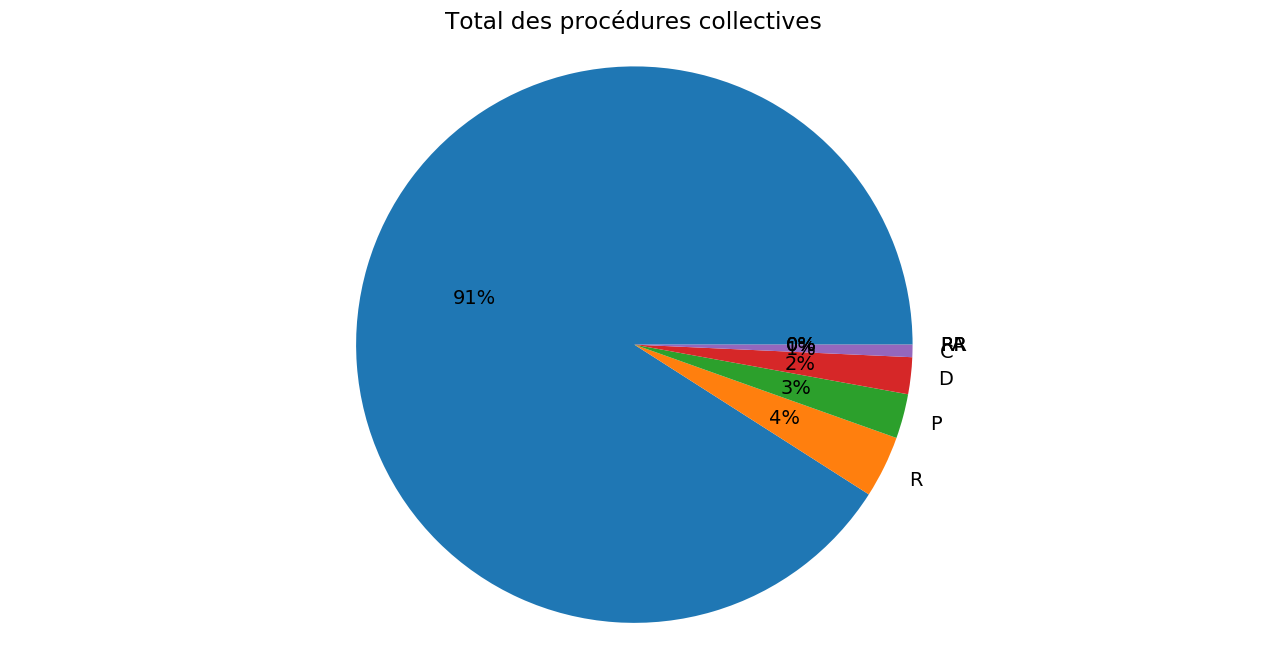

In [122]:
plt.rc('font', weight='normal', size=14)

fig = plt.figure(figsize=(16,8))
plt.pie(df_procol.ii_CJ, labels=df_procol.procol, autopct = lambda x:'{:1.0f}%'.format(x))
plt.axis('equal')
plt.title('Total des procédures collectives')
plt.show()